In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# データ読み込み

In [ ]:
articles_df = pd.read_csv(
    "../input/h-and-m-personalized-fashion-recommendations/articles.csv"
)
customers_df = pd.read_csv(
    "../input/h-and-m-personalized-fashion-recommendations/customers.csv"
)
transactions_df = pd.read_csv(
    "../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv"
)
transactions_df["t_dat"] = pd.to_datetime(transactions_df["t_dat"])

# 関数定義

In [ ]:
def analyze_categorical_columns(df: pd.DataFrame, columns: list, top_n: int = 15):
    """
    DataFrame内の指定されたカテゴリカルな列を体系的に分析し、可視化する関数。

    Args:
        df (pd.DataFrame): 対象のDataFrame
        columns (list): 分析したい列名のリスト
        top_n (int): 度数分布で上位何件を表示・可視化するか
    """
    print(f"--- カテゴリカル変数のEDAを開始します (対象: {len(columns)}列) ---")

    for col in columns:
        print("\n" + "=" * 50)
        print(f" Análisis de la columna: '{col}'")
        print("=" * 50)

        # 1. ユニーク数と欠損値の確認
        nunique = df[col].nunique()
        missing_count = df[col].isnull().sum()
        missing_pct = missing_count / len(df) * 100

        print(f"ユニークな値の数: {nunique}")
        print(f"欠損値の数: {missing_count} ({missing_pct:.2f}%)")
        print("-" * 30)

        # 2. 度数分布の確認
        print(f"【度数分布】上位{top_n}件:")
        value_counts = df[col].value_counts()
        print(value_counts.head(top_n).to_frame(name="count"))
        print("-" * 30)

        # 3. 可視化
        # ユニーク数が多すぎる場合は、上位top_n件のみをプロット
        if nunique > top_n:
            plot_title = f"'{col}' の度数分布 (上位{top_n}件)"
            plot_order = value_counts.head(top_n).index
        else:
            plot_title = f"'{col}' の度数分布"
            plot_order = value_counts.index

        plt.figure(figsize=(10, max(5, top_n / 3)))  # プロットサイズを件数に応じて調整
        sns.countplot(y=col, data=df, order=plot_order, palette="viridis")
        plt.title(plot_title, fontsize=15)
        plt.xlabel("Count", fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.show()

    print("\n--- 全ての分析が完了しました ---")

# transactions

In [47]:
transactions_df["sales_channel_id"].value_counts(dropna=False)

sales_channel_id
2    22379862
1     9408462
Name: count, dtype: int64

<Axes: xlabel='price'>

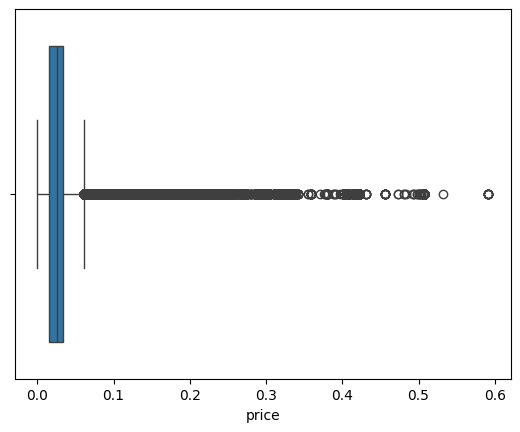

In [44]:
sns.boxplot(transactions_df, x="price")

In [42]:
print(
    len(set(articles_df["article_id"].values)),
    len(set(transactions_df["article_id"].values)),
    len(
        set(transactions_df["article_id"].values)
        ^ set(articles_df["article_id"].values)
    ),
    set(articles_df["article_id"].values) >= set(transactions_df["article_id"].values)
)

105542 104547 995 True


In [41]:
print(
    len(set(customers_df["customer_id"].values)),
    len(set(transactions_df["customer_id"].values)),
    len(
        set(transactions_df["customer_id"].values)
        ^ set(customers_df["customer_id"].values)
    ),
    set(customers_df["customer_id"].values) >= set(transactions_df["customer_id"].values)
)

1371980 1362281 9699 True


In [36]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [34]:
transactions_df["t_dat"] = pd.to_datetime(transactions_df["t_dat"])

In [32]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


# customer

In [30]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [29]:
customers_df["postal_code"].nunique() / len(customers_df)

0.25721876412192596

In [28]:
customers_df["postal_code"].value_counts()

postal_code
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: count, Length: 352899, dtype: int64

<Axes: xlabel='age'>

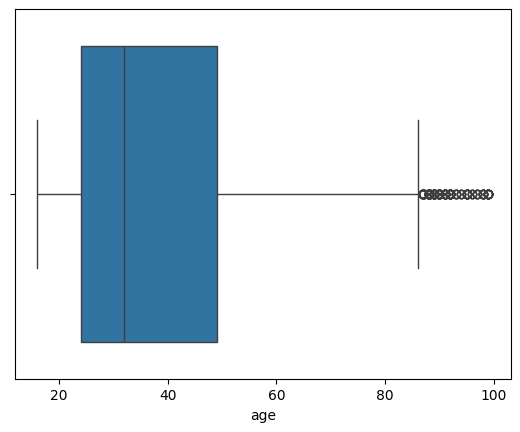

In [26]:
sns.boxplot(customers_df, x="age")

In [25]:
customers_df["age"].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [23]:
customers_df["fashion_news_frequency"].value_counts(dropna=False)

fashion_news_frequency
NONE         877711
Regularly    477416
NaN           16011
Monthly         842
Name: count, dtype: int64

In [21]:
customers_df["club_member_status"].value_counts(dropna=False)

club_member_status
ACTIVE        1272491
PRE-CREATE      92960
NaN              6062
LEFT CLUB         467
Name: count, dtype: int64

In [19]:
customers_df["Active"].value_counts(dropna=False)

Active
NaN    907576
1.0    464404
Name: count, dtype: int64

In [14]:
customers_df["FN"].value_counts(dropna=False)

FN
NaN    895050
1.0    476930
Name: count, dtype: int64

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [6]:
customers_df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [7]:
customers_df["customer_id"].nunique() == len(customers_df)

True

# articles

In [8]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [9]:
articles_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [10]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [11]:
articles_df.groupby(["product_group_name", "product_type_name"]).size()

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Length: 132, dtype: int64

--- カテゴリカル変数のEDAを開始します (対象: 25列) ---

 Análisis de la columna: 'article_id'
ユニークな値の数: 105542
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
            count
article_id       
108775015       1
760158001       1
760214002       1
760208001       1
760195006       1
760195005       1
760195004       1
760195003       1
760195002       1
760195001       1
760184002       1
760184001       1
760150001       1
760214005       1
760147001       1
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

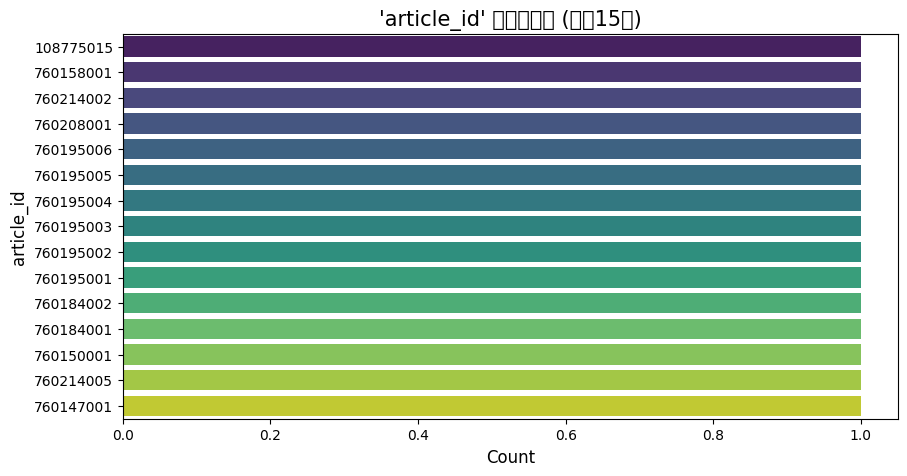

/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')



 Análisis de la columna: 'product_code'
ユニークな値の数: 47224
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
              count
product_code       
783707           75
684021           70
699923           52
699755           49
685604           46
739659           44
664074           41
570002           41
562245           41
685816           41
619739           40
695632           40
688916           39
610776           39
570003           39
------------------------------


/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyp

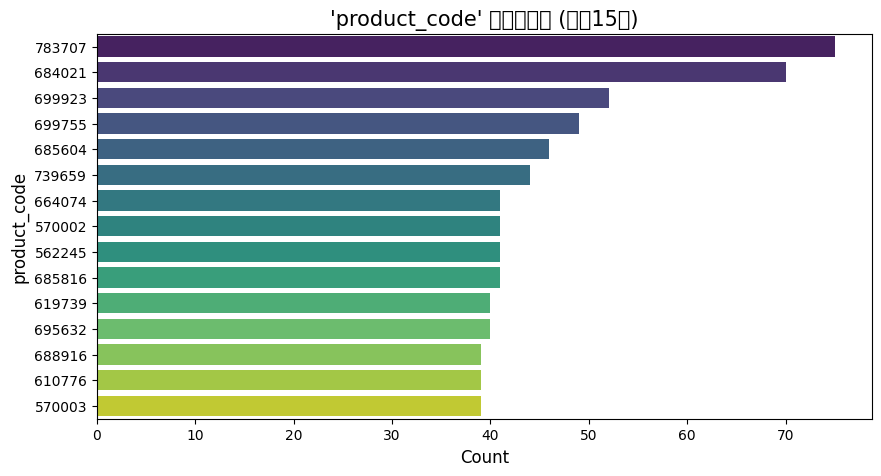


 Análisis de la columna: 'prod_name'
ユニークな値の数: 45875
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                       count
prod_name                   
Dragonfly dress           98
Mike tee                  72
Wow printed tee 6.99      70
1pk Fun                   55
TP Paddington Sweater     54
Pria tee                  51
Despacito                 48
MY                        44
Robin 3pk Fancy           43
DANTE set                 42
Eivor 7-p shaftless       42
R-NECK SS SLIM FIT        42
V-NECK SS SLIM FIT        41
HAPPY TEE TP              41
Charlie Top               41
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

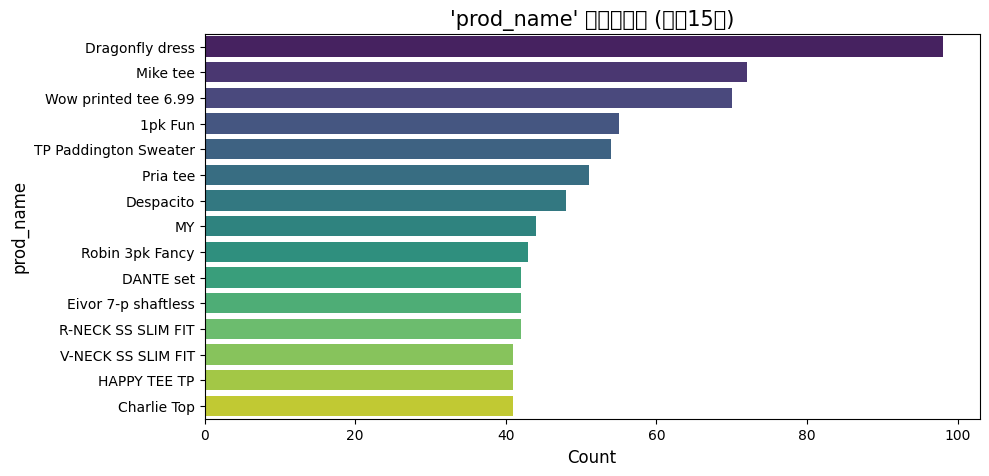


 Análisis de la columna: 'product_type_no'
ユニークな値の数: 132
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                 count
product_type_no       
272              11169
265              10362
252               9302
255               7904
254               4155
258               3979
262               3940
274               3939
259               3405
253               2991
286               2748
275               2696
308               2356
306               2212
302               1889
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

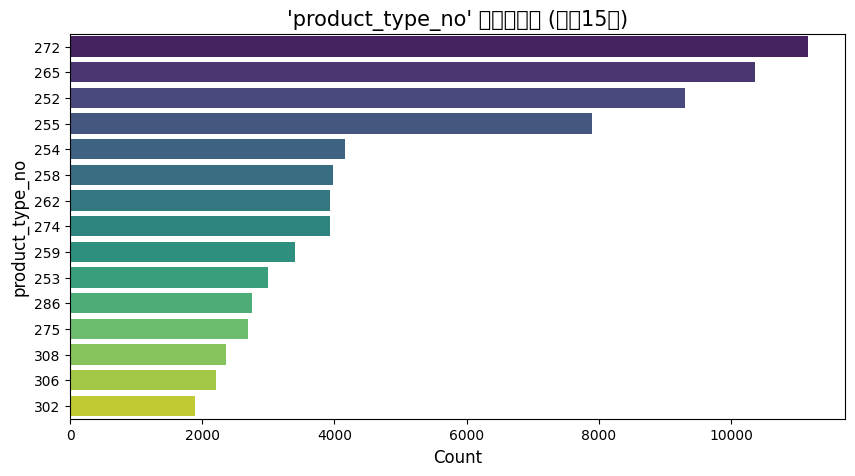


 Análisis de la columna: 'product_type_name'
ユニークな値の数: 131
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                   count
product_type_name       
Trousers           11169
Dress              10362
Sweater             9302
T-shirt             7904
Top                 4155
Blouse              3979
Jacket              3940
Shorts              3939
Shirt               3405
Vest top            2991
Underwear bottom    2748
Skirt               2696
Hoodie              2356
Bra                 2212
Socks               1889
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

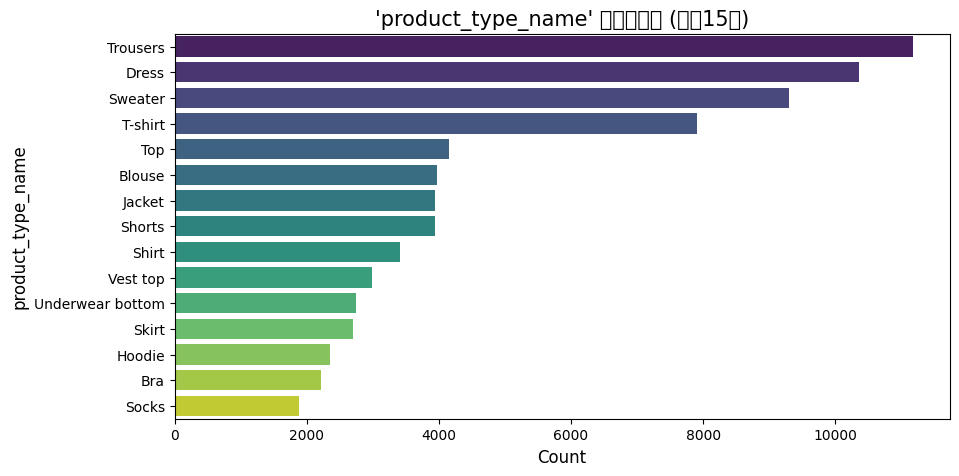


 Análisis de la columna: 'product_group_name'


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')


ユニークな値の数: 19
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                     count
product_group_name        
Garment Upper body   42741
Garment Lower body   19812
Garment Full body    13292
Accessories          11158
Underwear             5490
Shoes                 5283
Swimwear              3127
Socks & Tights        2442
Nightwear             1899
Unknown                121
Underwear/nightwear     54
Cosmetic                49
Bags                    25
Items                   17
Furniture               13
------------------------------


/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyp

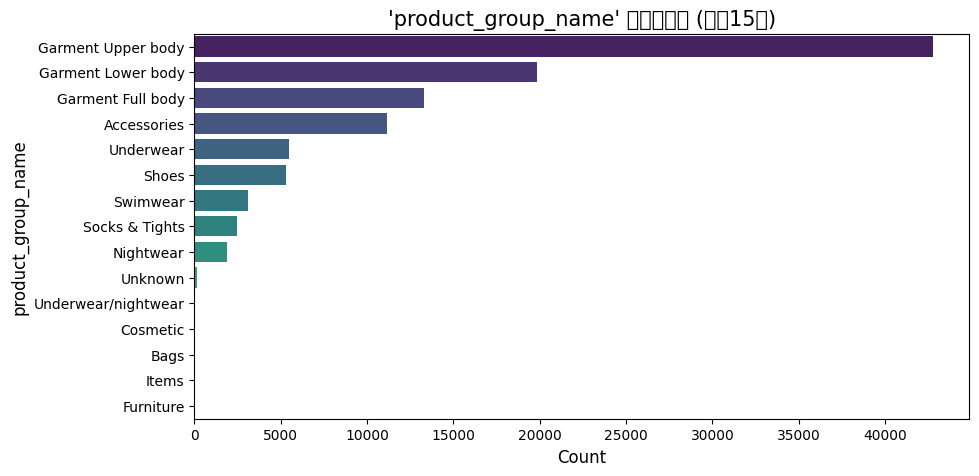


 Análisis de la columna: 'graphical_appearance_no'
ユニークな値の数: 30
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                         count
graphical_appearance_no       
1010016                  49747
1010001                  17165
1010010                   5938
1010017                   4990
1010023                   4842
1010008                   3215
1010014                   3098
1010004                   2178
1010005                   1830
1010021                   1513
1010026                   1502
1010002                   1341
1010007                   1165
1010012                   1132
1010009                    958
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

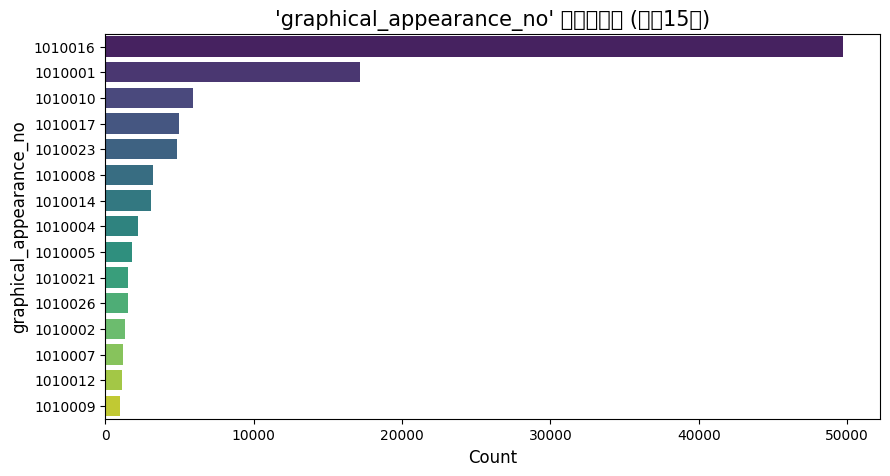


 Análisis de la columna: 'graphical_appearance_name'
ユニークな値の数: 30
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                           count
graphical_appearance_name       
Solid                      49747
All over pattern           17165
Melange                     5938
Stripe                      4990
Denim                       4842
Front print                 3215
Placement print             3098
Check                       2178
Colour blocking             1830
Lace                        1513
Other structure             1502
Application/3D              1341
Embroidery                  1165
Mixed solid/pattern         1132
Glittering/Metallic          958
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

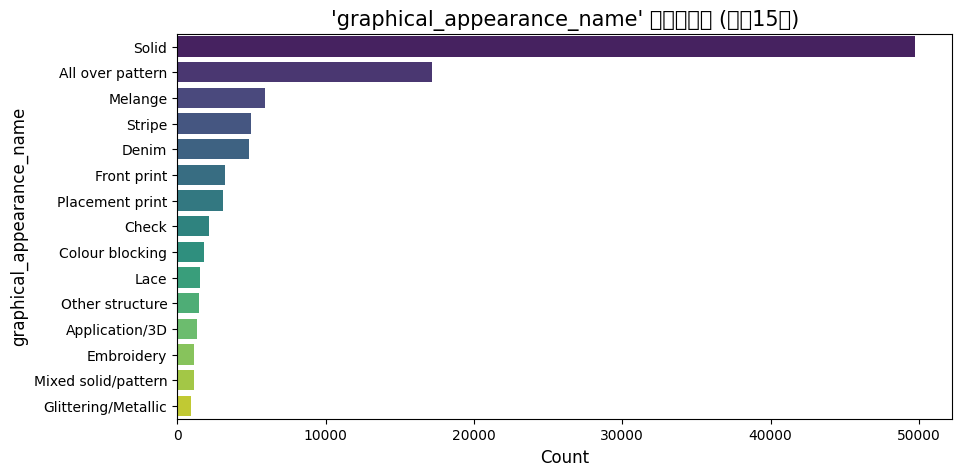


 Análisis de la columna: 'colour_group_code'
ユニークな値の数: 50
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                   count
colour_group_code       
9                  22670
73                 12171
10                  9542
51                  5811
7                   4487
12                  3356
72                  3308
42                  3056
71                  3012
19                  2767
8                   2731
11                  2726
13                  2712
43                  2340
93                  2106
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

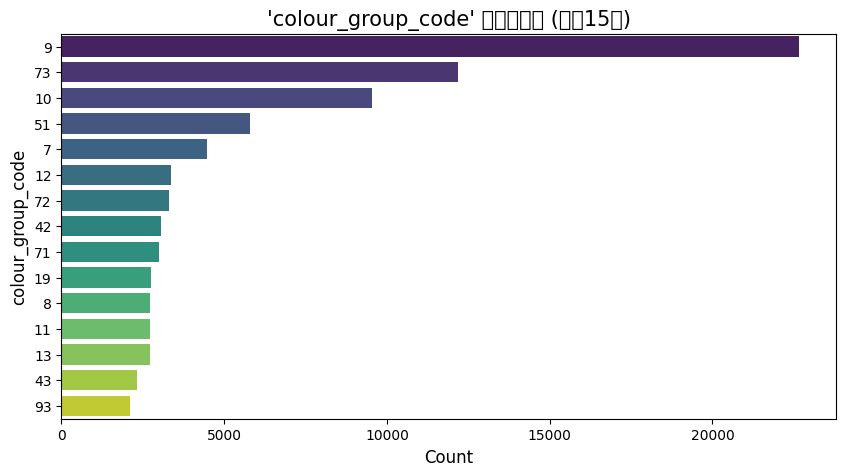


 Análisis de la columna: 'colour_group_name'
ユニークな値の数: 50
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                   count
colour_group_name       
Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

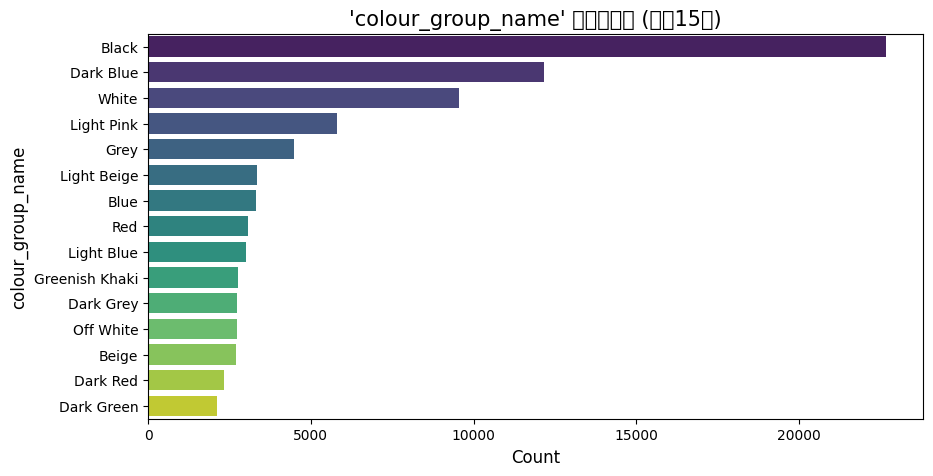


 Análisis de la columna: 'perceived_colour_value_id'
ユニークな値の数: 8
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                           count
perceived_colour_value_id       
 4                         42706
 1                         22152
 3                         15739
 2                         12630
 5                          6471
 7                          5711
 6                           105
-1                            28
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

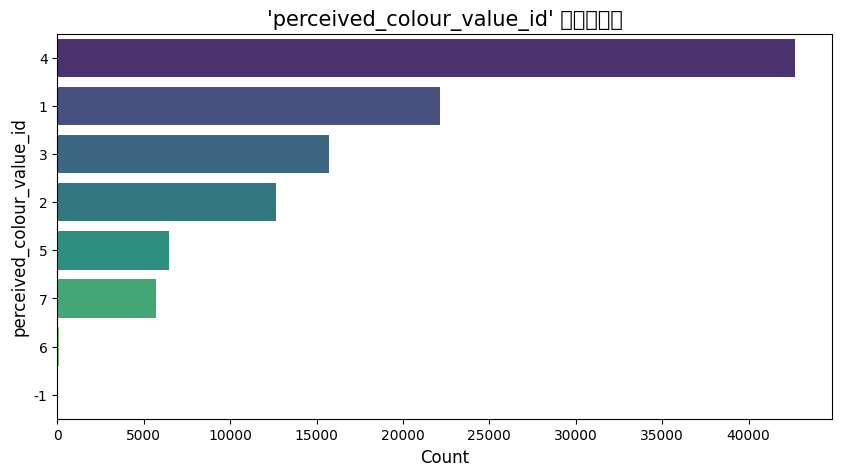


 Análisis de la columna: 'perceived_colour_value_name'
ユニークな値の数: 8
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                             count
perceived_colour_value_name       
Dark                         42706
Dusty Light                  22152
Light                        15739
Medium Dusty                 12630
Bright                        6471
Medium                        5711
Undefined                      105
Unknown                         28
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

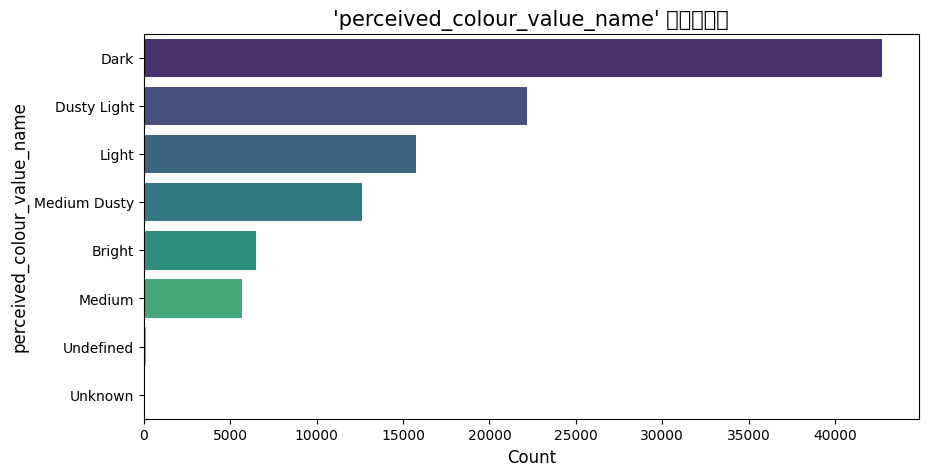


 Análisis de la columna: 'perceived_colour_master_id'
ユニークな値の数: 20
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                            count
perceived_colour_master_id       
5                           22585
2                           18469
9                           12665
4                            9403
12                           8924
18                           5878
11                           5657
19                           3526
20                           3181
8                            3121
3                            2734
13                           2269
15                           2180
7                            1829
1                            1223
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

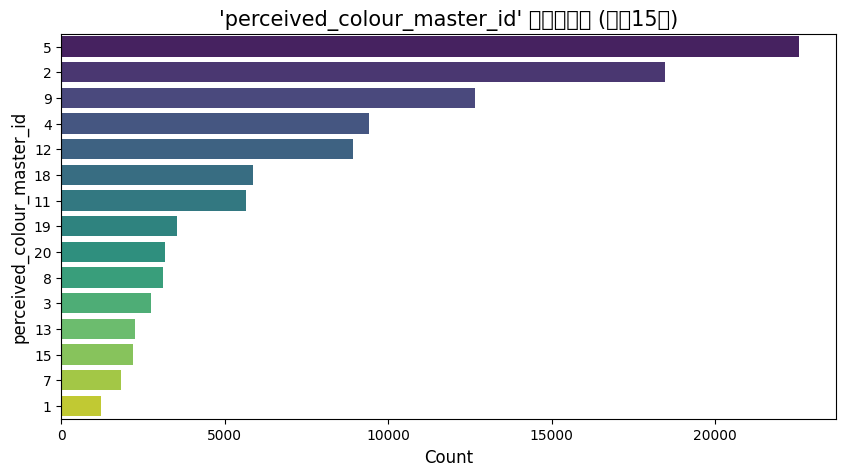


 Análisis de la columna: 'perceived_colour_master_name'
ユニークな値の数: 20
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                              count
perceived_colour_master_name       
Black                         22585
Blue                          18469
White                         12665
Pink                           9403
Grey                           8924
Red                            5878
Beige                          5657
Green                          3526
Khaki green                    3181
Yellow                         3121
Orange                         2734
Brown                          2269
Metal                          2180
Turquoise                      1829
Mole                           1223
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

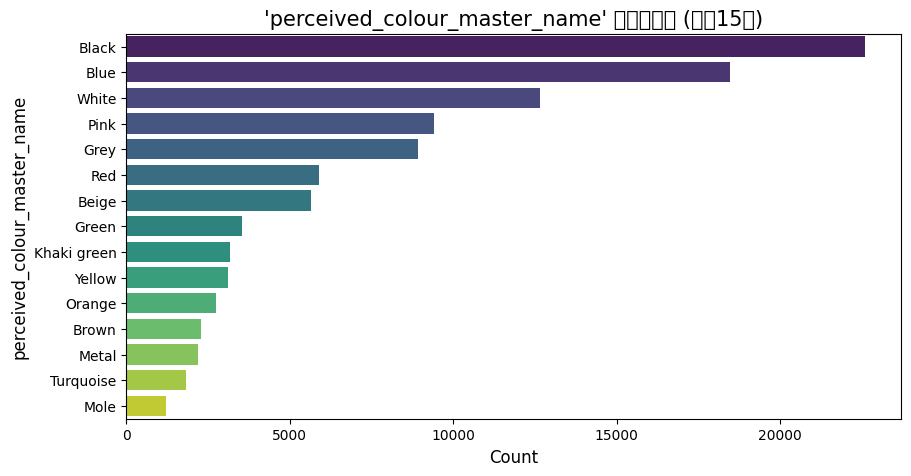


 Análisis de la columna: 'department_no'
ユニークな値の数: 299
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
               count
department_no       
7616            2032
1338            1921
8716            1874
4242            1839
7648            1488
1640            1429
1636            1402
1676            1359
1344            1354
1643            1339
1322            1206
1522            1177
4344            1163
6515            1147
2032            1120
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

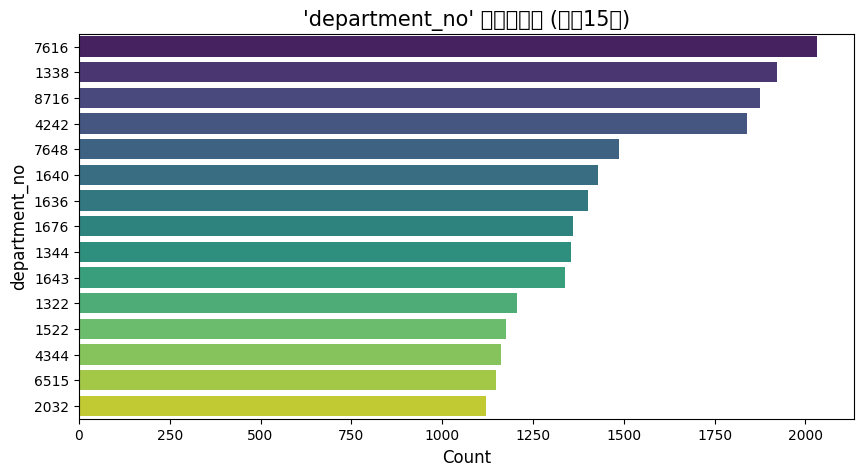


 Análisis de la columna: 'department_name'
ユニークな値の数: 250
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                         count
department_name               
Jersey                    4604
Knitwear                  3503
Trouser                   2655
Blouse                    2362
Dress                     2087
Swimwear                  2075
Kids Girl Jersey Fancy    2032
Expressive Lingerie       1921
Young Girl Jersey Fancy   1874
Jersey Fancy              1754
Jersey Basic              1514
Kids Boy Jersey Fancy     1488
Tops Fancy Jersey         1429
Jersey fancy              1402
Dresses                   1354
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

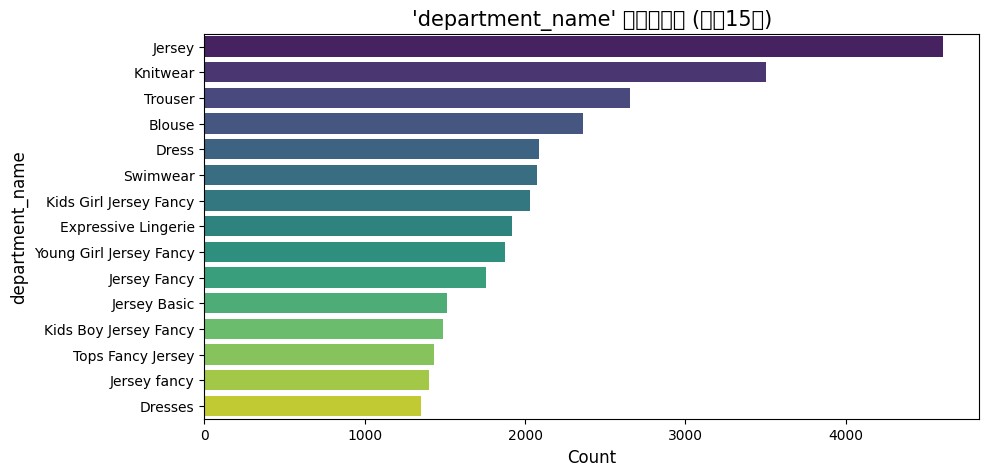


 Análisis de la columna: 'index_code'
ユニークな値の数: 10
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
            count
index_code       
A           26001
D           15149
F           12553
H           12007
I            9214
G            8875
C            6961
B            6775
J            4615
S            3392
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

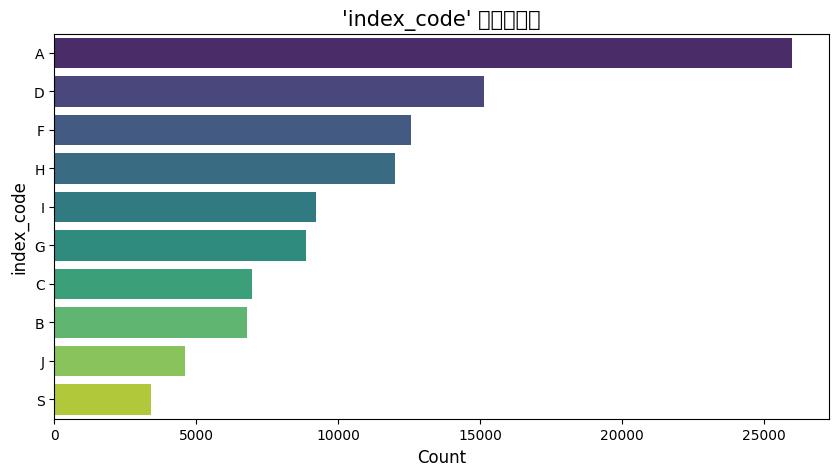


 Análisis de la columna: 'index_name'
ユニークな値の数: 10
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                                count
index_name                           
Ladieswear                      26001
Divided                         15149
Menswear                        12553
Children Sizes 92-140           12007
Children Sizes 134-170           9214
Baby Sizes 50-98                 8875
Ladies Accessories               6961
Lingeries/Tights                 6775
Children Accessories, Swimwear   4615
Sport                            3392
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

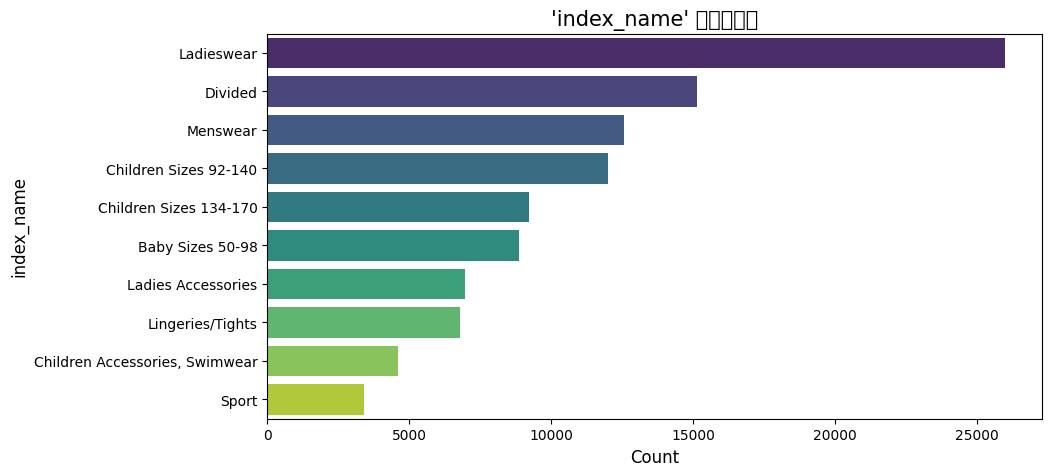


 Análisis de la columna: 'index_group_no'
ユニークな値の数: 5
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                count
index_group_no       
1               39737
4               34711
2               15149
3               12553
26               3392
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

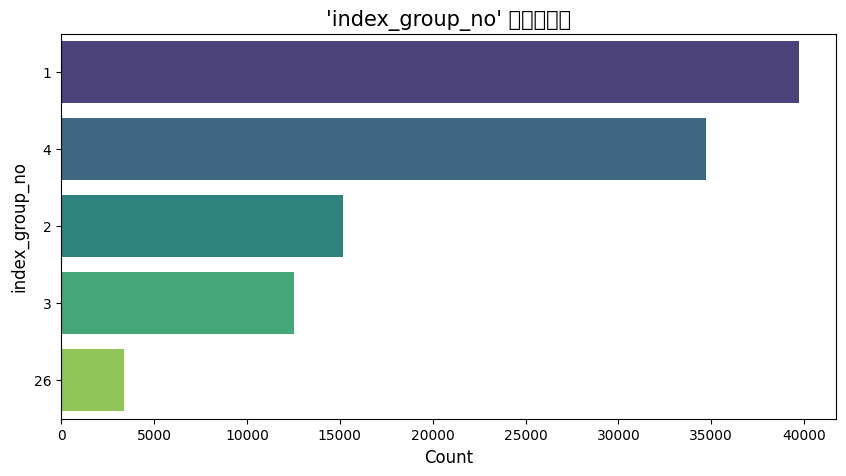


 Análisis de la columna: 'index_group_name'
ユニークな値の数: 5
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                  count
index_group_name       
Ladieswear        39737
Baby/Children     34711
Divided           15149
Menswear          12553
Sport              3392
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

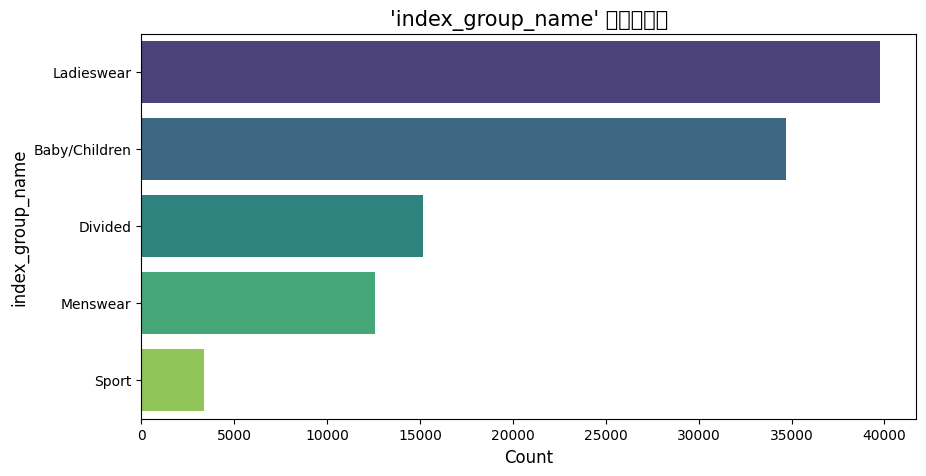


 Análisis de la columna: 'section_no'
ユニークな値の数: 57
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
            count
section_no       
15           7295
53           7124
44           4932
76           4469
77           3899
61           3598
79           3490
11           3376
46           3328
66           3270
6            2725
45           2665
18           2622
50           2364
47           2352
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

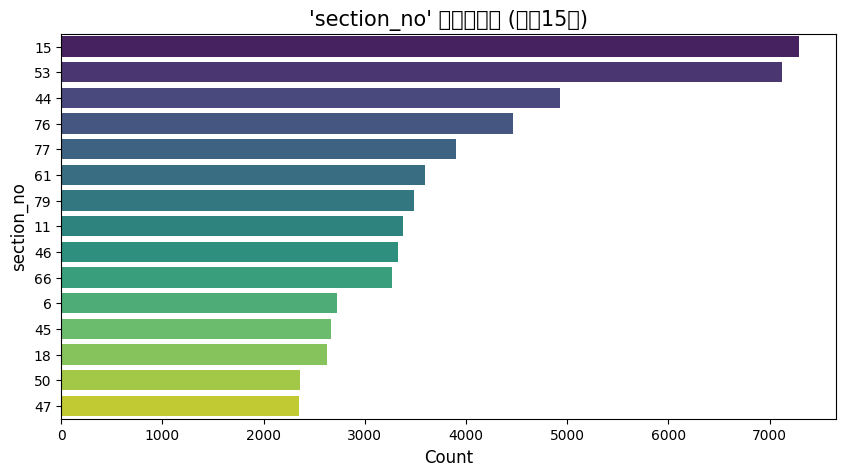


 Análisis de la columna: 'section_name'
ユニークな値の数: 56
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                               count
section_name                        
Womens Everyday Collection      7295
Divided Collection              7124
Baby Essentials & Complements   4932
Kids Girl                       4469
Young Girl                      3899
Womens Lingerie                 3598
Girls Underwear & Basics        3490
Womens Tailoring                3376
Kids Boy                        3328
Womens Small accessories        3270
Womens Casual                   2725
Kids Outerwear                  2665
Womens Trend                    2622
Divided Projects                2364
Young Boy                       2352
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

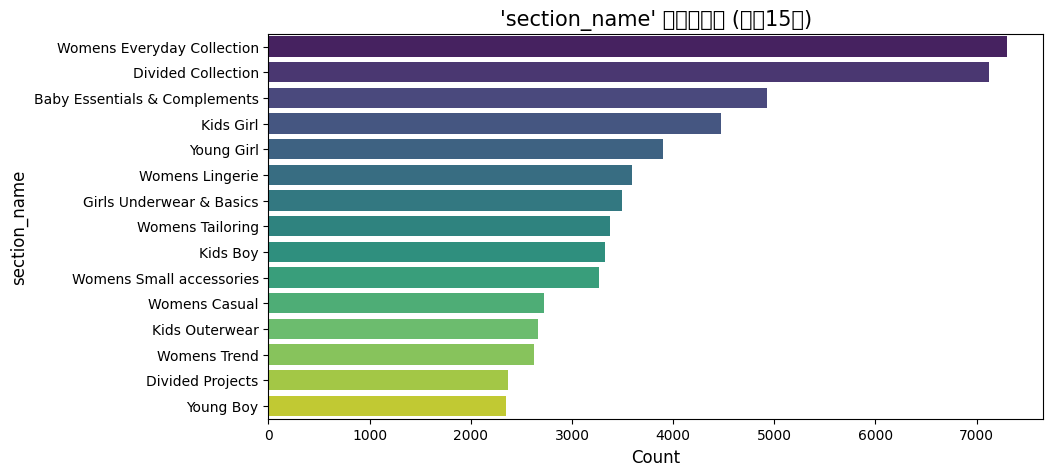


 Análisis de la columna: 'garment_group_no'
ユニークな値の数: 21
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                  count
garment_group_no       
1005              21445
1019              11519
1002               8126
1003               7490
1017               7441
1009               6727
1010               5838
1020               5145
1013               4874
1007               4501
1001               3873
1016               3100
1018               2787
1021               2272
1011               2116
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

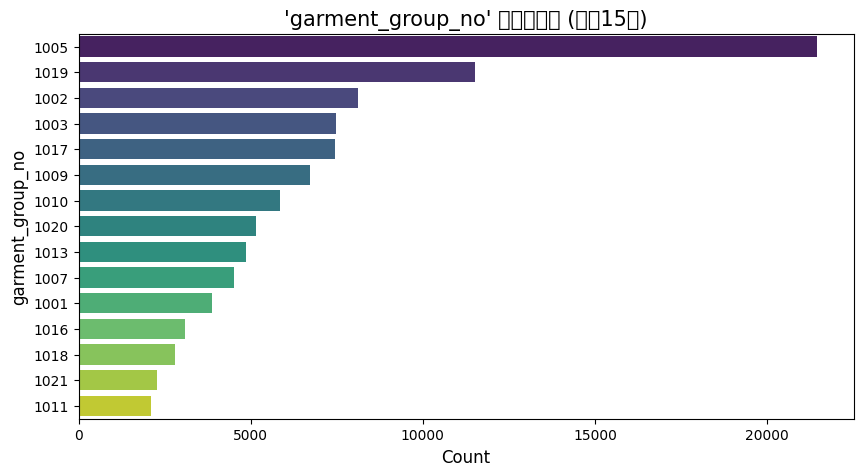


 Análisis de la columna: 'garment_group_name'
ユニークな値の数: 21
欠損値の数: 0 (0.00%)
------------------------------
【度数分布】上位15件:
                    count
garment_group_name       
Jersey Fancy        21445
Accessories         11519
Jersey Basic         8126
Knitwear             7490
Under-, Nightwear    7441
Trousers             6727
Blouses              5838
Shoes                5145
Dresses Ladies       4874
Outdoor              4501
Unknown              3873
Trousers Denim       3100
Swimwear             2787
Socks and Tights     2272
Shirts               2116
------------------------------


/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

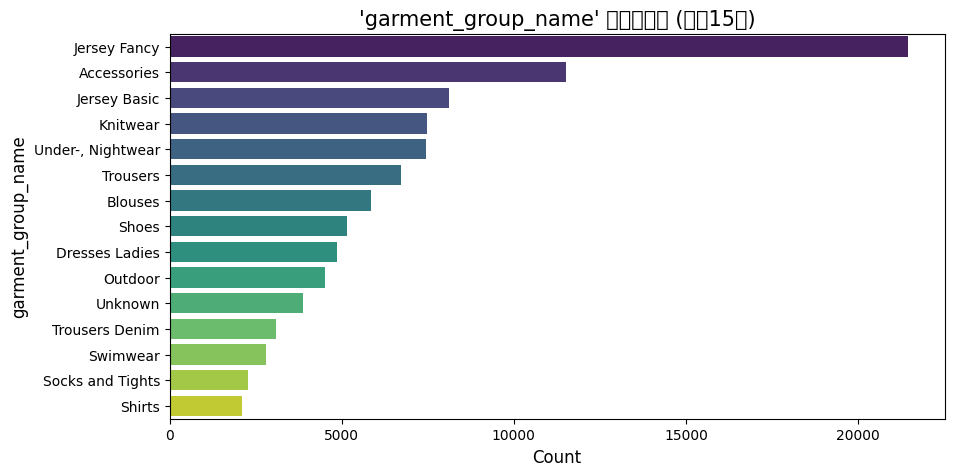


 Análisis de la columna: 'detail_desc'
ユニークな値の数: 43404
欠損値の数: 416 (0.39%)
------------------------------
【度数分布】上位15件:
                                                    count
detail_desc                                              
T-shirt in printed cotton jersey.                     159
Leggings in soft organic cotton jersey with an ...    138
T-shirt in soft, printed cotton jersey.               137
Socks in a soft, jacquard-knit cotton blend wit...    136
Fine-knit trainer socks in a soft cotton blend ...    134
Socks in a soft, fine-knit cotton blend with el...    118
Sunglasses with plastic frames and UV-protectiv...    117
Boxer shorts in a cotton weave with an elastica...    104
Fine-knit socks in a soft cotton blend.                97
Tights in a soft, fine-knit cotton blend with a...     97
Boxer shorts in cotton jersey with short legs, ...     93
Fine-knit tights in a soft cotton blend with an...     92
Boxer shorts in organic cotton jersey with shor...     92
Round-necke

/var/folders/__/m14hrzl53k710md95kzyzk6m0000gn/T/ipykernel_22438/3493172507.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=plot_order, palette='viridis')
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minami/dev/handm/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

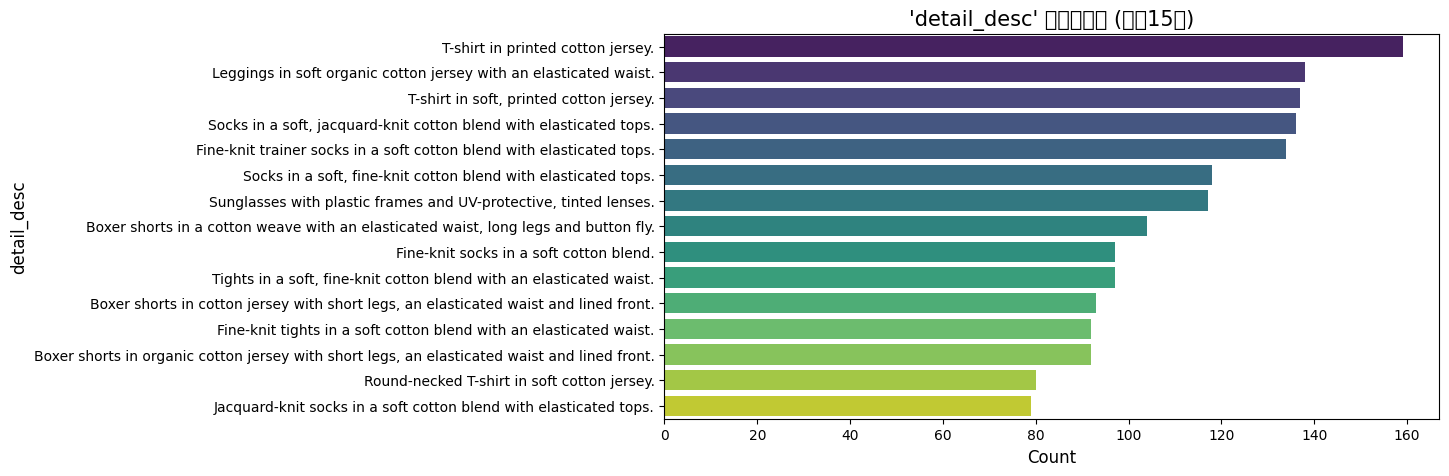


--- 全ての分析が完了しました ---


In [12]:
analyze_categorical_columns(articles_df, articles_df.columns)